In [8]:

import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
s=time.time()


df_train = pd.read_excel('df_total_raw_train.xlsx', na_values=['-OVER','+OVER'])
df_train.interpolate(inplace=True)

df_test = pd.read_excel('df_total_raw_test.xlsx', na_values=['-OVER','+OVER'])
df_test.interpolate(inplace=True)

x_train = df_train[['T1_lp1_MIN', 'T2_hp1_MIN', 'T1_comp in_MIN', 'T1_comp in_MAX', 'T2_comp out_MIN', 'T2_comp out_MAX', 'T3_cond in_MIN', 'T3_cond in_MAX', 'T4_cond out_MAX', 'T5_Exp in_MIN', 'T5_Exp in_MAX', 'T6_Exp out_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T10_sol out_MIN', 'inside temp_MIN', 'center_MIN',
 'eva air out temp_MIN', 'eva air out temp_MAX', 'T8_1-T7_MIN']]
y_train = df_train['Heat_ON']

x_test = df_test[['T1_lp1_MIN', 'T2_hp1_MIN', 'T1_comp in_MIN', 'T1_comp in_MAX', 'T2_comp out_MIN', 'T2_comp out_MAX', 'T3_cond in_MIN', 'T3_cond in_MAX', 'T4_cond out_MAX', 'T5_Exp in_MIN', 'T5_Exp in_MAX', 'T6_Exp out_MIN', 'T7_evap in_MAX', 'T8_evap out1_MIN', 'T10_sol out_MIN', 'inside temp_MIN', 'center_MIN',
 'eva air out temp_MIN', 'eva air out temp_MAX', 'T8_1-T7_MIN']]
y_test = df_test['Heat_ON']


# lightgbm classifier 선택
lgbmclf = LGBMClassifier(random_state=0, n_estimators=200, learning_rate=0.05, objective='multiclass')
# REFCV로 Feature들을 반복적으로 제거해가면서 학습/평가 수행
evals = [(x_test, y_test)]
lgbmclf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric="multi_logloss", eval_set=evals, verbose=True)

lgbmclf_accuracy_score=accuracy_score(y_test, lgbmclf.predict(x_test))
print('acc : {0:.4f}'.format(lgbmclf_accuracy_score))
print(time.time()-s)

C:\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  

[1]	valid_0's multi_logloss: 0.819218
[2]	valid_0's multi_logloss: 0.722413
[3]	valid_0's multi_logloss: 0.643856
[4]	valid_0's multi_logloss: 0.577287
[5]	valid_0's multi_logloss: 0.519763
[6]	valid_0's multi_logloss: 0.469465
[7]	valid_0's multi_logloss: 0.425157
[8]	valid_0's multi_logloss: 0.385827
[9]	valid_0's multi_logloss: 0.350776
[10]	valid_0's multi_logloss: 0.319391
[11]	valid_0's multi_logloss: 0.291174
[12]	valid_0's multi_logloss: 0.26576
[13]	valid_0's multi_logloss: 0.242809
[14]	valid_0's multi_logloss: 0.22203
[15]	valid_0's multi_logloss: 0.203204
[16]	valid_0's multi_logloss: 0.186112
[17]	valid_0's multi_logloss: 0.17057
[18]	valid_0's multi_logloss: 0.156436
[19]	valid_0's multi_logloss: 0.14356
[20]	valid_0's multi_logloss: 0.1318
[21]	valid_0's multi_logloss: 0.121077
[22]	valid_0's multi_logloss: 0.11126
[23]	valid_0's multi_logloss: 0.102286
[24]	valid_0's multi_logloss: 0.0940827
[25]	valid_0's multi_logloss: 0.0865824
[26]	valid_0's multi_logloss: 0.0797149

acc : 0.9997
75.75617122650146


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

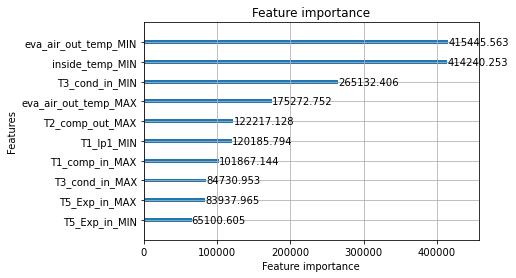

In [5]:
from lightgbm import plot_importance
plot_importance(lgbmclf,max_num_features=10, importance_type='gain')

In [6]:
y_pred = lgbmclf.predict(x_test)
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

f1_score(y_test, y_pred, average='micro')

0.9997418022205009